In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


C:\Users\DELL\AppData\Local\Temp\ipykernel_15784\3308609391.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  map_vir = cm.get_cmap(name='spring')
C:\Users\DELL\AppData\Local\Temp\ipykernel_15784\3308609391.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb.ax.set_yticklabels([0, 1500, 3000, 4500, 6000, 7500], fontname="Arial")
C:\Users\DELL\AppData\Local\Temp\ipykernel_15784\3308609391.py:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  map_vir = cm.get_cmap(name='cool')
C:\Users\DELL\AppData\Local\Temp\ipykernel_15784\3308609391.py:122: UserWarning: se

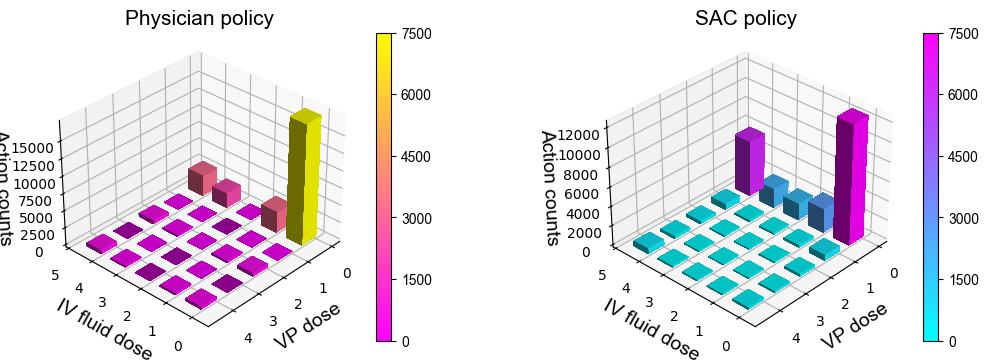

In [2]:
if __name__ == '__main__':
    fig = plt.figure(figsize=(20, 4), facecolor='w')

    def discretize_action(action, n_bins=5, low=-1.0, high=1.0):
        # action = (x, y)
        iv_idx = int(np.clip((action[0] - low) /
                     (high - low) * n_bins, 0, n_bins - 1))
        vaso_idx = int(
            np.clip((action[1] - low) / (high - low) * n_bins, 0, n_bins - 1))
        return (iv_idx, vaso_idx)
    
    # First subplot
    ax = fig.add_subplot(132, projection='3d')

    D3Q_actions = np.load('../../MADDPG-algorithm/agent_actionsb.npy', allow_pickle=True)
    phys_actions = np.load('../../MADDPG-algorithm/phys_actionsb.npy', allow_pickle=True)

    inv_action_map = {}
    count = 0
    for i in range(5):
        for j in range(5):
            inv_action_map[count] = [i, j]
            count += 1


    
    phys_actions_tuple = [None for i in range(len(phys_actions))]

    for i in range(len(phys_actions)):
        # phys_actions_tuple[i] = inv_action_map[phys_actions[i]]
        phys_actions_tuple[i] = discretize_action(phys_actions[i])



    phys_actions_tuple = np.array(phys_actions_tuple)

    phys_actions_iv = phys_actions_tuple[:, 0]
    phys_actions_vaso = phys_actions_tuple[:, 1]
    hist, x_edges, y_edges = np.histogram2d(phys_actions_iv, phys_actions_vaso, bins=5)

    x_edges = np.arange(-0.5, 5)
    y_edges = np.arange(-0.5, 5)

    Z = hist.reshape(25)
    z_sun = sum(Z)
    height = np.zeros_like(Z)
    xx, yy = np.meshgrid(x_edges, y_edges)
    X, Y = xx.ravel(), yy.ravel()

    width = depth = 0.6  # Bar width and depth

    for i in range(0, 5):
        for j in range(0, 5):
            z = hist[i][j]  # Bar height
            norm = plt.Normalize(0, 0.25)
            norm_values = norm(z / z_sun)
            map_vir = cm.get_cmap(name='spring')
            colors = map_vir(norm_values)
            sc1 = ax.bar3d(j, i, height, width, depth, z, color=colors)

    font1 = {'family': 'Arial', 'weight': 'normal'}

    ax.set_xlabel('VP dose', fontsize=14, fontname="Arial")
    ax.set_ylabel('IV fluid dose', fontsize=14, fontname="Arial")
    ax.set_zlabel('Action counts', fontsize=14, fontname="Arial")
    ax.set_title("Physician policy", fontsize=15, fontname="Arial")

    # Create the colorbar for ax
    sm = cm.ScalarMappable(cmap=map_vir, norm=norm)
    sm.set_array([])
    cb = fig.colorbar(sm, ax=ax)  # Link to ax (first 3D plot)
    cb.ax.tick_params(labelsize=10)  # Set font size of colorbar ticks
    cb.ax.set_yticklabels([0, 1500, 3000, 4500, 6000, 7500], fontname="Arial")

    ax.set_ylim(5, -0.5)
    ax.view_init(32, 43)

    # Second subplot (define ax2 after using it in the colorbar)
    ax2 = fig.add_subplot(133, projection='3d')


    IDDE_actions = np.load('../../MADDPG-algorithm/agent_actionsb.npy', allow_pickle=True)

    IDDE_actions_tuple = [None for i in range(len(IDDE_actions))]
    for i in range(len(IDDE_actions)):
        # IDDE_actions_tuple[i] = inv_action_map[IDDE_actions[i]]
        IDDE_actions_tuple[i] = discretize_action(IDDE_actions[i])
        

    IDDE_actions_tuple = np.array(IDDE_actions_tuple)
    IDDE_actions_iv = IDDE_actions_tuple[:, 0]
    IDDE_actions_vaso = IDDE_actions_tuple[:, 1]
    IDDE_hist, x_edges, y_edges = np.histogram2d(IDDE_actions_iv, IDDE_actions_vaso, bins=5)

    x_edges = np.arange(-0.5, 5)
    y_edges = np.arange(-0.5, 5)

    Z = IDDE_hist.reshape(25)
    z_sun = sum(Z)
    height = np.zeros_like(Z)
    xx, yy = np.meshgrid(x_edges, y_edges)

    for i in range(0, 5):
        for j in range(0, 5):
            z = IDDE_hist[i][j]  # Bar height
            norm = plt.Normalize(0, 0.25)
            norm_values = norm(z / z_sun)
            map_vir = cm.get_cmap(name='cool')
            colors = map_vir(norm_values)
            sc2 = ax2.bar3d(j, i, height, width, depth, z, color=colors)

    ax2.set_xlabel('VP dose', fontsize=14, fontname="Arial")
    ax2.set_ylabel('IV fluid dose', fontsize=14, fontname="Arial")
    ax2.set_zlabel('Action counts', fontsize=14, fontname="Arial")
    ax2.set_title("SAC policy", fontsize=15, fontname="Arial")

    # Create the colorbar for ax2
    sm2 = cm.ScalarMappable(cmap=map_vir, norm=norm)
    sm2.set_array([])
    cb2 = fig.colorbar(sm2, ax=ax2)  # Link to ax2 (second 3D plot)
    cb2.ax.tick_params(labelsize=10)  # Set font size of colorbar ticks
    cb2.ax.set_yticklabels([0, 1500, 3000, 4500, 6000, 7500], fontname="Arial")

    ax2.set_ylim(5, -0.5)
    ax2.view_init(32, 43)

    plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_27436\3314970071.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  map_vir = cm.get_cmap(name='spring')
C:\Users\DELL\AppData\Local\Temp\ipykernel_27436\3314970071.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb1.ax.set_yticklabels([0, 1500, 3000, 4500, 6000, 7500], fontname="Arial")
C:\Users\DELL\AppData\Local\Temp\ipykernel_27436\3314970071.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cb.ax.set_yticklabels([0, 1500, 3000, 4500, 6000, 7500], fontname="Arial")
C:\Users\DELL\AppData\Local\Temp\ipykernel_27436\3314970071.py:99: MatplotlibDeprecationWarning: The get_cmap function was deprecate

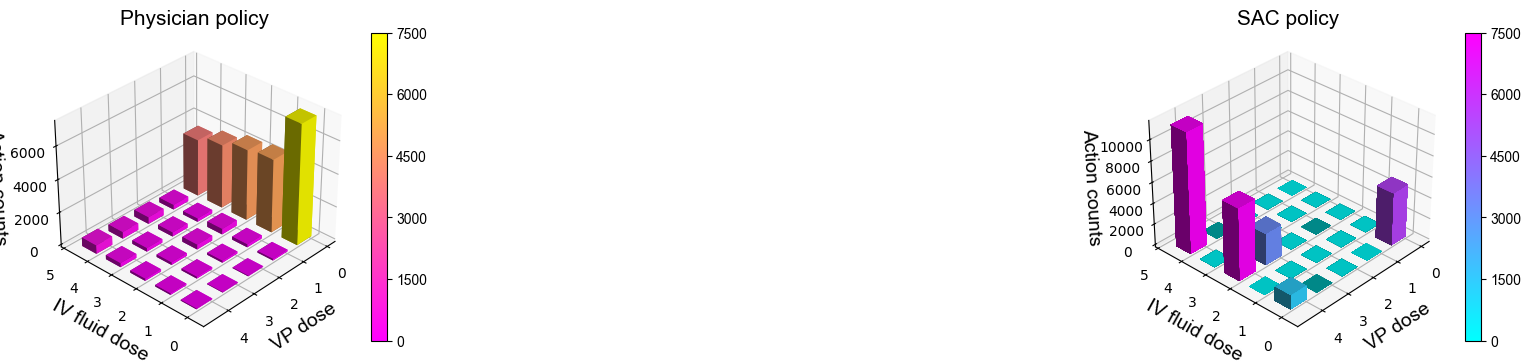

In [5]:
if __name__ == '__main__':
    fig = plt.figure(figsize=(20, 4), facecolor='w')

    # Subplot untuk Physician Policy
    ax1 = fig.add_subplot(131, projection='3d')

    D3Q_actions = np.load(
        '../../MADDPG-algorithm/agent_actionsb.npy', allow_pickle=True)
    phys_actions = np.load(
        '../../MADDPG-algorithm/phys_actionsb.npy', allow_pickle=True)

    inv_action_map = {}
    count = 0
    for i in range(5):
        for j in range(5):
            inv_action_map[count] = [i, j]
            count += 1

    phys_actions_tuple = [inv_action_map[act] for act in phys_actions]
    phys_actions_tuple = np.array(phys_actions_tuple)

    phys_actions_iv = phys_actions_tuple[:, 0]
    phys_actions_vaso = phys_actions_tuple[:, 1]
    hist, _, _ = np.histogram2d(phys_actions_iv, phys_actions_vaso, bins=5)

    x_edges = np.arange(-0.5, 5)
    y_edges = np.arange(-0.5, 5)

    Z = hist.reshape(25)
    z_sun = sum(Z)
    height = np.zeros_like(Z)
    xx, yy = np.meshgrid(x_edges, y_edges)
    X, Y = xx.ravel(), yy.ravel()

    width = depth = 0.6

    for i in range(0, 5):
        for j in range(0, 5):
            z = hist[i][j]
            norm = plt.Normalize(0, 0.25)
            norm_values = norm(z / z_sun)
            map_vir = cm.get_cmap(name='spring')
            colors = map_vir(norm_values)
            ax1.bar3d(j, i, height[i * 5 + j], width, depth, z, color=colors)

    ax1.set_xlabel('VP dose', fontsize=14, fontname="Arial")
    ax1.set_ylabel('IV fluid dose', fontsize=14, fontname="Arial")
    ax1.set_zlabel('Action counts', fontsize=14, fontname="Arial")
    ax1.set_title("Physician policy", fontsize=15, fontname="Arial")

    sm = cm.ScalarMappable(cmap=map_vir, norm=norm)
    sm.set_array([])
    cb1 = plt.colorbar(sm, ax=ax1)
    cb1.ax.tick_params(labelsize=10)
    cb1.ax.set_yticklabels([0, 1500, 3000, 4500, 6000, 7500], fontname="Arial")

    ax1.set_ylim(5, -0.5)
    ax1.view_init(32, 43)

    # Create the colorbar for ax
    sm = cm.ScalarMappable(cmap=map_vir, norm=norm)
    sm.set_array([])
    cb = fig.colorbar(sm, ax=ax)  # Link to ax (first 3D plot)
    cb.ax.tick_params(labelsize=10)  # Set font size of colorbar ticks
    cb.ax.set_yticklabels([0, 1500, 3000, 4500, 6000, 7500], fontname="Arial")

    ax.set_ylim(5, -0.5)
    ax.view_init(32, 43)

    # Second subplot (define ax2 after using it in the colorbar)
    ax2 = fig.add_subplot(133, projection='3d')

    IDDE_actions = np.load(
        '../../MADDPG-algorithm/agent_actionsb.npy', allow_pickle=True)

    IDDE_actions_tuple = [None for i in range(len(IDDE_actions))]
    for i in range(len(IDDE_actions)):
        IDDE_actions_tuple[i] = inv_action_map[IDDE_actions[i]]

    IDDE_actions_tuple = np.array(IDDE_actions_tuple)
    IDDE_actions_iv = IDDE_actions_tuple[:, 0]
    IDDE_actions_vaso = IDDE_actions_tuple[:, 1]
    IDDE_hist, x_edges, y_edges = np.histogram2d(
        IDDE_actions_iv, IDDE_actions_vaso, bins=5)

    x_edges = np.arange(-0.5, 5)
    y_edges = np.arange(-0.5, 5)

    Z = IDDE_hist.reshape(25)
    z_sun = sum(Z)
    height = np.zeros_like(Z)
    xx, yy = np.meshgrid(x_edges, y_edges)

    for i in range(0, 5):
        for j in range(0, 5):
            z = IDDE_hist[i][j]  # Bar height
            norm = plt.Normalize(0, 0.25)
            norm_values = norm(z / z_sun)
            map_vir = cm.get_cmap(name='cool')
            colors = map_vir(norm_values)
            sc2 = ax2.bar3d(j, i, height, width, depth, z, color=colors)

    ax2.set_xlabel('VP dose', fontsize=14, fontname="Arial")
    ax2.set_ylabel('IV fluid dose', fontsize=14, fontname="Arial")
    ax2.set_zlabel('Action counts', fontsize=14, fontname="Arial")
    ax2.set_title("SAC policy", fontsize=15, fontname="Arial")

    # Create the colorbar for ax2
    sm2 = cm.ScalarMappable(cmap=map_vir, norm=norm)
    sm2.set_array([])
    cb2 = fig.colorbar(sm2, ax=ax2)  # Link to ax2 (second 3D plot)
    cb2.ax.tick_params(labelsize=10)  # Set font size of colorbar ticks
    cb2.ax.set_yticklabels([0, 1500, 3000, 4500, 6000, 7500], fontname="Arial")

    ax2.set_ylim(5, -0.5)
    ax2.view_init(32, 43)

    plt.show()